# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [717]:
#Import all the necessary modules
import numpy as np
import pandas as pd

from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, auc

import matplotlib.pyplot as plt   
import seaborn as sns
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


The file can be accessed directly from the URL (https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data or you may first download it to a local folder and then load it into Python dataframe.  Let us assume the data frame is named pima_df


In [718]:
colnamesfromKaggle = ['Pregnancies','Glucose','BP','SkinThickness','Insulin','BMI','DiabPedigreeFunction','Age','Outcome']
pima_df = pd.read_csv("pima-indians-diabetes-2.data", names= colnamesfromKaggle)

It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [719]:
pima_df.head(10)

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,DiabPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Q3 Print the datatypes of each column and the shape of the dataset 

In [720]:
pima_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies             768 non-null int64
Glucose                 768 non-null int64
BP                      768 non-null int64
SkinThickness           768 non-null int64
Insulin                 768 non-null int64
BMI                     768 non-null float64
DiabPedigreeFunction    768 non-null float64
Age                     768 non-null int64
Outcome                 768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [721]:
pima_df[pima_df == 0].count()
#SkinThickness(227)	Insulin(374)	BMI(11),BP(35) cannot be zero, these are more like missing values, so replacing them column median as asked.

Pregnancies             111
Glucose                   5
BP                       35
SkinThickness           227
Insulin                 374
BMI                      11
DiabPedigreeFunction      0
Age                       0
Outcome                 500
dtype: int64

In [722]:
med = pima_df.BMI.median()
print('median=',med)

median= 32.0


In [723]:
med = pima_df.BMI.median()
pima_df.loc[ pima_df.BMI == 0, "BMI" ] = med
pima_df[pima_df == 0].count()

Pregnancies             111
Glucose                   5
BP                       35
SkinThickness           227
Insulin                 374
BMI                       0
DiabPedigreeFunction      0
Age                       0
Outcome                 500
dtype: int64

In [724]:
med = pima_df.SkinThickness.median()
pima_df.loc[ pima_df.SkinThickness == 0, "SkinThickness" ] = med
pima_df[pima_df == 0].count()

Pregnancies             111
Glucose                   5
BP                       35
SkinThickness             0
Insulin                 374
BMI                       0
DiabPedigreeFunction      0
Age                       0
Outcome                 500
dtype: int64

In [725]:
med = pima_df.Insulin.median()
pima_df.loc[ pima_df.Insulin == 0, "Insulin" ] = med
pima_df[pima_df == 0].count()

Pregnancies             111
Glucose                   5
BP                       35
SkinThickness             0
Insulin                   0
BMI                       0
DiabPedigreeFunction      0
Age                       0
Outcome                 500
dtype: int64

In [726]:
med = pima_df.BP.median()
print(med)
pima_df.loc[ pima_df.BP == 0, "BP" ] = med
pima_df[pima_df == 0].count()

72.0


Pregnancies             111
Glucose                   5
BP                        0
SkinThickness             0
Insulin                   0
BMI                       0
DiabPedigreeFunction      0
Age                       0
Outcome                 500
dtype: int64

In [727]:
med = pima_df.Glucose.median()
pima_df.loc[ pima_df.Glucose == 0, "Glucose" ] = med
pima_df[pima_df == 0].count()

Pregnancies             111
Glucose                   0
BP                        0
SkinThickness             0
Insulin                   0
BMI                       0
DiabPedigreeFunction      0
Age                       0
Outcome                 500
dtype: int64

# Q5 Print the descriptive statistics of each & every column using describe() function

In [729]:
pima_df.describe()

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,DiabPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

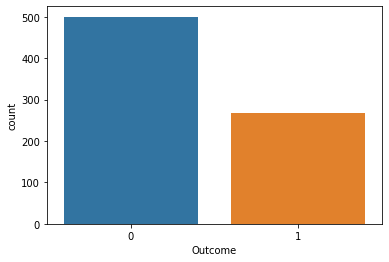

In [730]:
sns.countplot(x=pima_df['Outcome'])

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

In [733]:
pima_df.describe()

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,DiabPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [734]:
pima_df.head()

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,DiabPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,30.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,30.5,26.6,0.351,31,0
2,8,183.0,64.0,23.0,30.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [735]:
print(pima_df.Pregnancies.max())
print(pima_df.Pregnancies.min())

17
0


In [736]:
print(pima_df.BMI.max())
print(pima_df.BMI.min())

67.1
18.2


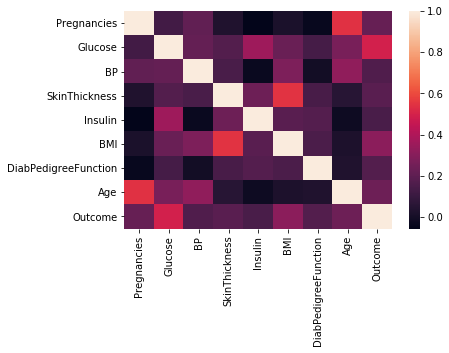

In [737]:
 sns.heatmap(pima_df.corr())

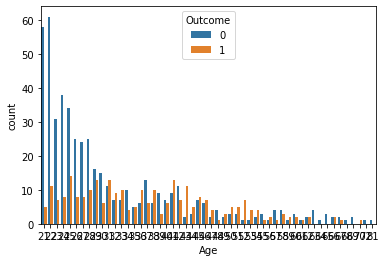

In [738]:
sns.countplot(x='Age',hue='Outcome',data=pima_df)
#sns.boxplot(x='Insulin',data=pima_df)

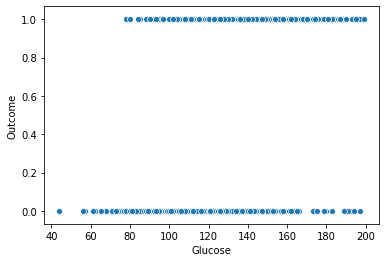

In [739]:
sns.scatterplot(data=pima_df,x='Glucose',y='Outcome')

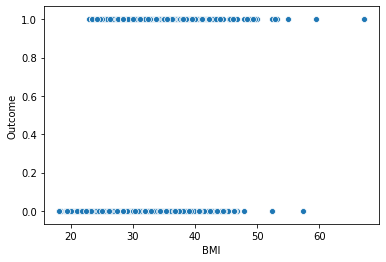

In [741]:
sns.scatterplot(data=pima_df,x='BMI',y='Outcome')
#sns.lmplot(data=pima_df,x='BMI',y='Outcome')

# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


Using the plot - infer the relationship between different variables

C:\Users\rashm\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\rashm\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


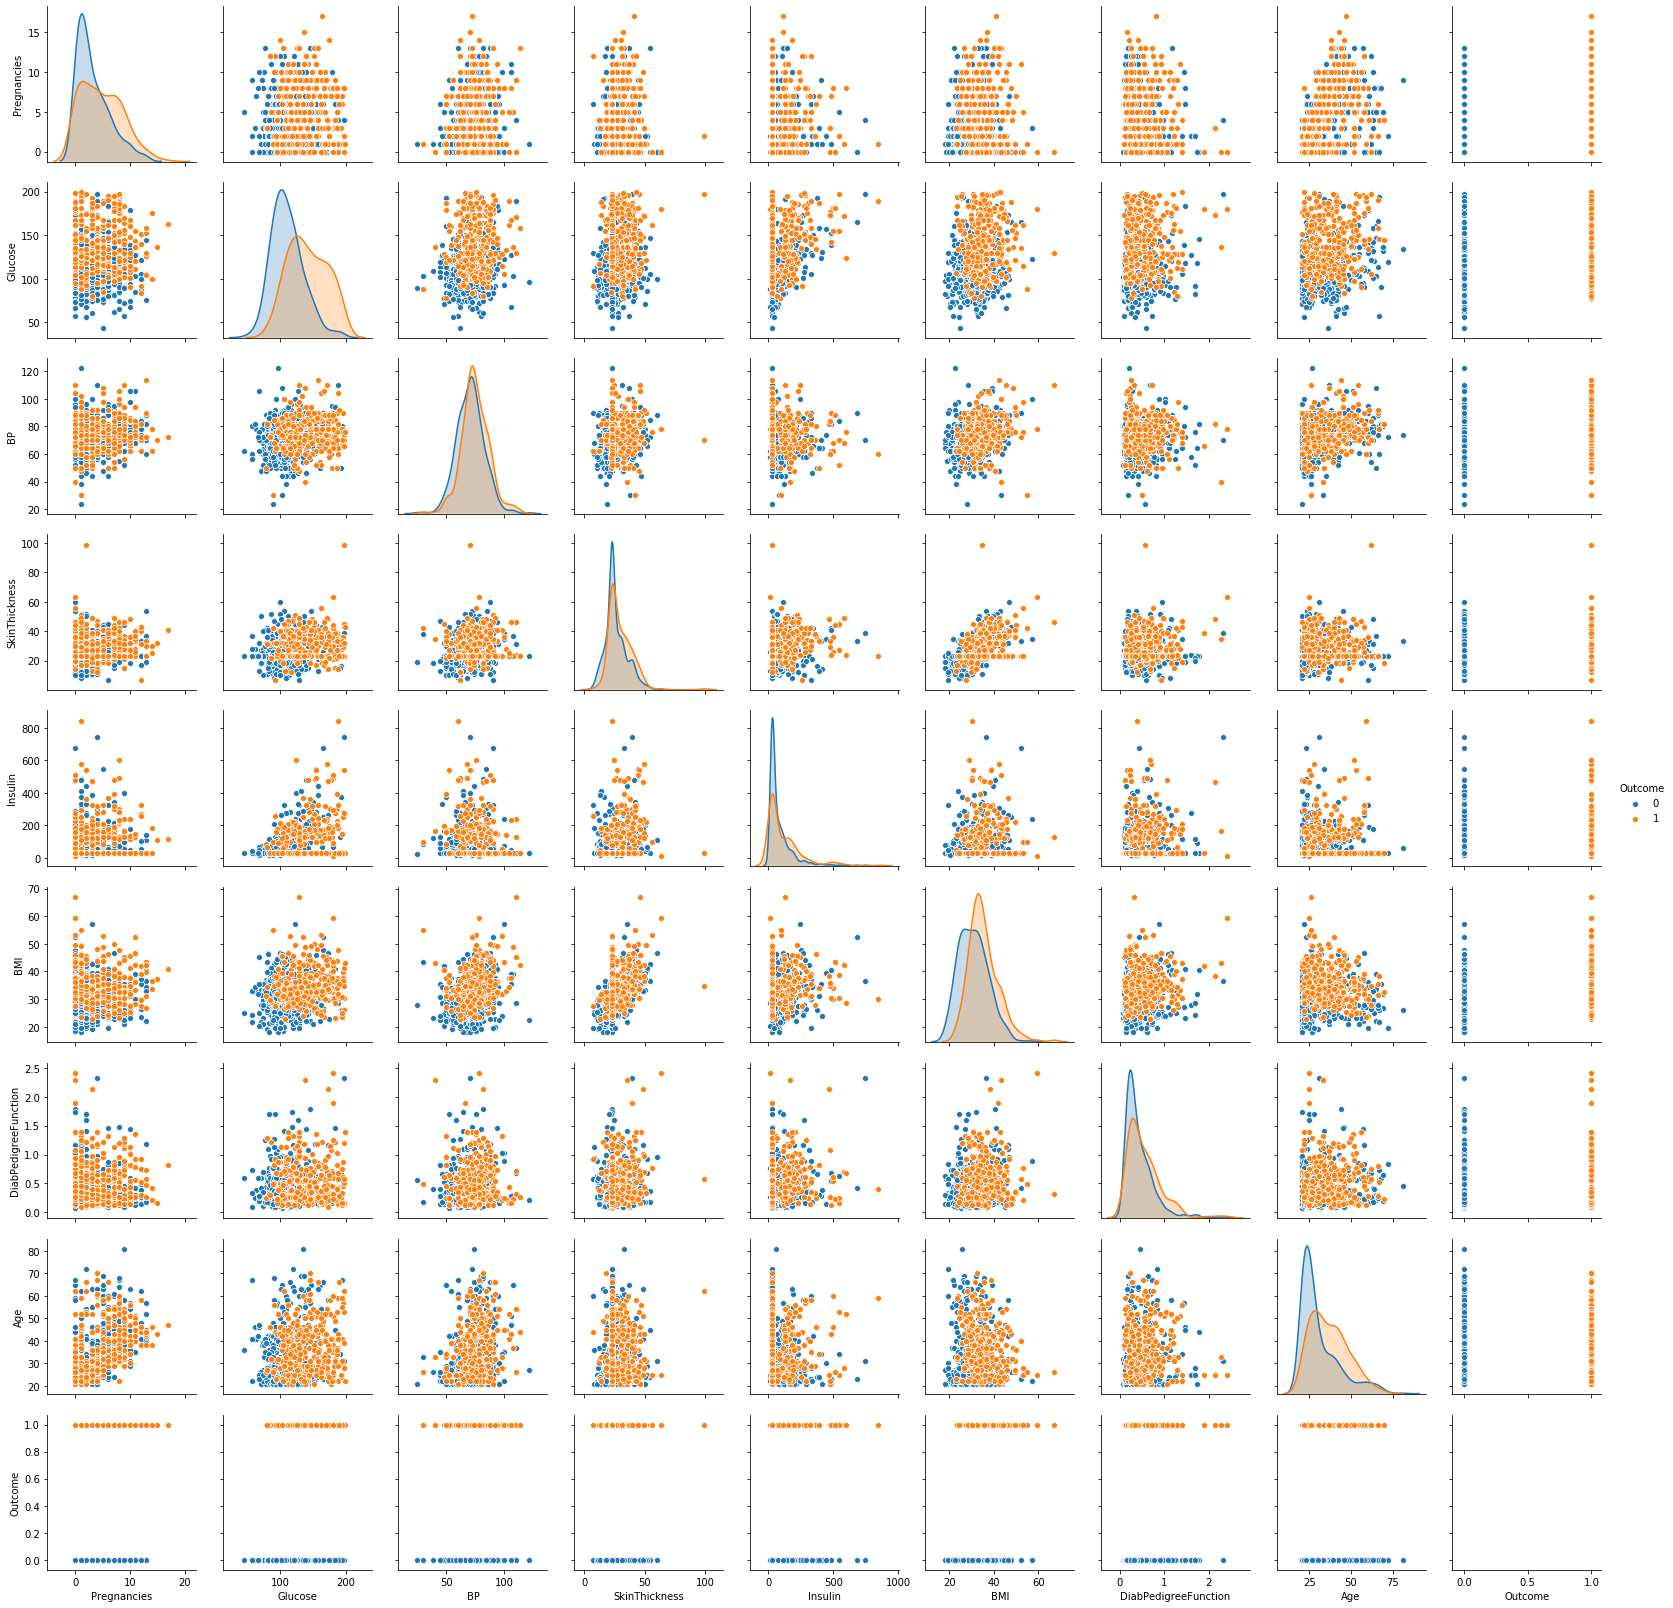

In [307]:
sns.pairplot(pima_df,diag_kind='kde',hue='Outcome')

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [744]:
from sklearn.model_selection import train_test_split

X = pima_df.drop("Outcome", axis=1)
y = pima_df["Outcome"]

test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)


# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [745]:
from sklearn.tree import DecisionTreeClassifier
#pima_df.info()
                                  
dt_model = DecisionTreeClassifier(criterion = 'entropy',max_depth = 20,max_leaf_nodes=30)

In [746]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=20,
                       max_features=None, max_leaf_nodes=30,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

# Q10 Print the accuracy of the model & print the confusion matrix 

In [747]:
print(dt_model.score(X_train , y_train))

print(dt_model.score(X_test , y_test))

0.8752327746741154
0.7272727272727273


In [748]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, auc
y_predict = dt_model.predict(X_test)
metrics.confusion_matrix( y_test,y_predict)

array([[118,  29],
       [ 34,  50]], dtype=int64)

Print the feature importance of the decision model - Optional

In [749]:
importances = dt_model.feature_importances_
importances
print(dict(zip(pima_df.columns, dt_model.feature_importances_)))

{'Pregnancies': 0.05216090128179684, 'Glucose': 0.437391556511129, 'BP': 0.06357053109119072, 'SkinThickness': 0.0, 'Insulin': 0.04218866200297843, 'BMI': 0.2038411026543002, 'DiabPedigreeFunction': 0.08108558943031355, 'Age': 0.1197616570282912}


# Q11 Apply the Random forest model and print the accuracy of Random forest Model

In [750]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 200, max_depth=10, max_features=0.50, max_leaf_nodes=60)
rfcl = rfcl.fit(X_train, y_train)

In [751]:
print(rfcl.score(X_train, y_train))
print(rfcl.score(X_test, y_test))

0.9851024208566108
0.7705627705627706


# Q12 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [752]:
from sklearn.ensemble import AdaBoostClassifier
dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 8,max_leaf_nodes=15)
abcl = AdaBoostClassifier(base_estimator=dt_model, n_estimators=40)

abcl = abcl.fit(X_train, y_train)

In [753]:
print(abcl.score(X_train, y_train))
print(abcl.score(X_test , y_test))

1.0
0.7619047619047619


# Q13 - Apply Bagging Classifier Algorithm and print the accuracy.

In [754]:
from sklearn.ensemble import BaggingClassifier
dt_model = DecisionTreeClassifier(criterion = 'entropy',max_depth = 20,max_leaf_nodes=30)
bgcl = BaggingClassifier(base_estimator=dt_model, n_estimators=50)

bgcl = bgcl.fit(X_train, y_train)

In [755]:
print(bgcl.score(X_train, y_train))
print(bgcl.score(X_test , y_test))

0.9366852886405959
0.7575757575757576


# Q14 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [756]:
from sklearn.ensemble import GradientBoostingClassifier

gbcl = GradientBoostingClassifier(n_estimators = 40, learning_rate = 0.09, max_depth=15)
gbcl = bgcl.fit(X_train, y_train)

In [757]:
print(gbcl.score(X_train, y_train))
print(gbcl.score(X_test , y_test))

0.931098696461825
0.7575757575757576
